# Sentiment Analysis on IMDB Dataset 

**This study corresponds to implement a Support Vector Classifier
  and compare its performance with the classifier inbuilt in scikit-learn library on the famous use case of Sentiment Analysis on IMDB   movie review Dataset.**

### 1. Dataset Exploration and preprocessing

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import nltk        # Natural Language Toolkit Library for preprocessing
import re          # regex
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pickle
from sklearn.preprocessing import LabelEncoder
import seaborn
import joblib
import matplotlib.pyplot as plt

**1.1 Loading the Data**

**Dataset Details**

We will be using the IMDB movie reviews dataset for this study.
The dataset contains 50,000 reviews — 25,000 positive and 25,000 negative reviews.


In [3]:
df = pd.read_csv("../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Sample review**

In [4]:
df['review'].iloc[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

**1.2 Removing Stopwords**
The process of converting data to something a computer can understand is referred to as pre-processing. One of the major forms of pre-processing is to filter out useless data.
What are Stop words?
In natural language processing, useless words (data), are referred to as stop words.

Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

We would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words.

In [5]:
list_names = []

In [6]:
stopwords_eng = stopwords.words('english')
stopwords_eng.append('br')
print(stopwords_eng)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**1.3 Tokenizing and Stemming**
Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

Tokenization is the process of partitioning text into a sequence of word, whitespace, and punctuation tokens. A tokenization dictionary identifies runs of text that should be considered words.After tokenizing we can remove stopwords and unnecessary punctuations. 

In [7]:
sent = nltk.sent_tokenize(df.iloc[0]['review'])
print(sent)

["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked.", 'They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO.', 'Trust me, this is not a show for the faint hearted or timid.', 'This show pulls no punches with regards to drugs, sex or violence.', 'Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary.', 'It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda.', "Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the sh

In [8]:
corpus = []
review = []
ps = PorterStemmer()
for i in sent:
    review.extend(nltk.word_tokenize(re.sub('[^a-zA-Z]', ' ', i).lower()))
    #ps.stem(word)
    review = [ps.stem(word) for word in review if word not in stopwords_eng]

review = ' '.join(review)    
print("Review: ", review)

Review:  one review mention watch oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focu mainli emerald citi experi section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side


**1.4 Applying Preprocessing steps on the complete data**

In [ ]:
corpus=[]
for i in range(5000):
    #review = re.sub('[^a-zA-Z]',' ',df['review'][i]) # chalega
    #review = review.lower()
    #review = review.split()
    #review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    #review=' '.join(review)
    review = nltk.word_tokenize(re.sub('[^a-zA-Z]', ' ', df['review'][i]).lower())
    #ps.stem(word)
    review = [ps.stem(word) for word in review if word not in stopwords_eng]
    review=' '.join(review)
    corpus.append(review)
#corpus

In [12]:
def preprocess(data):
    
    for i in range(len(data)):
        
        sent = nltk.sent_tokenize(data.iloc[i]['review']) # brake paragraph into sentence
        
        corpus = []
        review = []
        
        for j in sent:
            review.extend(nltk.word_tokenize(re.sub('[^a-zA-Z]', ' ', j).lower()))
            #ps.stem(word)
            review = [ps.stem(word) for word in review if word not in stopwords_eng]

        review = ' '.join(review)    
        
        data.iloc[i]['review'] = review
        
        if(i % 5000 == 0):
            print("Done : ", i)
    print("Done :", i)
    print("Complete Successfully")

In [13]:
preprocess(df)

Done :  0
Done :  5000
Done :  10000
Done :  15000
Done :  20000
Done :  25000
Done :  30000
Done :  35000
Done :  40000
Done :  45000
Done : 49999
Complete Successfully


In [14]:
df.head()

,review,sentiment
0,one review mention watch oz episod hook right ...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic famili littl boy jake think zombi closet...,negative
4,petter mattei love time money visual stun film...,positive


**Encode categorical labels using LabelEncoder**

In [15]:
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])
df.head()

,review,sentiment
0,one review mention watch oz episod hook right ...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,1


**1.5 Save the preprocessed data, for further using it without carrying preprocessing again and again.**

In [16]:
df.to_csv("./processed_reviews.csv", index = False)

**1.6 Loading Preprocessed Dataset**

In [17]:
prep_data = pd.read_csv("./processed_reviews.csv")
#prep_data = pd.read_csv("../input/imdbmoviereviewpreprocessedstemming50k/prepd_data.csv")
#prep_data.drop(columns = ['Unnamed: 0'], inplace = True)
prep_data.head()

,review,sentiment
0,one review mention watch oz episod hook right ...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,1


In [18]:
corpus = list(prep_data['review'])
corpus[0]

'one review mention watch oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focu mainli emerald citi experi section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injust crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view get touch darker side'

comments on corpus - 

**1.7 Function definition get_data(n_grams, prep_data):**

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

def get_data(n_grams, prep_data):

    '''Since we are experimenting for different n-grams so 
       define a function which returns you the completely processed
       data ready to be fed to the model.
       arguements: n_grams => tuple , prep_data => data frame
       returns: training data and labels, test data and labels'''
    
    cv = TfidfVectorizer(max_features=5000, ngram_range=n_grams)
    X = cv.fit_transform(list(prep_data['review'])).toarray()
    
    print("TF-IDF calculation: Done!!")
    
    y = prep_data['sentiment']
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.5, shuffle=True)
    
    print("Splitted data")
    
    return x_train,x_test,y_train,y_test

## 2.Training and Evaluating the models

**2.1 Training Support Vector Classifier using scikit-learn library

In [22]:
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, classification_report
from sklearn.svm import SVC

target_names = ['Negative sentiment', 'Positive Sentiment']

#### **SVM using 1-gram**

In [24]:
x_train,x_test,y_train,y_test = get_data(n_grams=(1,1),prep_data = prep_data)
model_inbuilt_1gram = SVC(kernel='linear', verbose= 1, max_iter=1000)
model_inbuilt_1gram.fit(x_train,y_train,sample_weight=None)

print("1-gram SVM Classifier score on Training data: {:.2f}%\n\n".format(model_inbuilt_1gram.score(x_train, y_train)*100))

TF-IDF calculation: Done!!
Splitted data
[LibSVM]

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


1-gram SVM Classifier score on Training data: 80.03%




In [25]:
y_pred1_1g = model_inbuilt_1gram.predict(x_test)
cm1_1g = confusion_matrix(y_test,y_pred1_1g)

accuracy1_1g= accuracy_score(y_test,y_pred1_1g)
f11_1g = f1_score(y_test,y_pred1_1g)
prec1_1g = precision_score(y_test,y_pred1_1g)
recall1_1g = recall_score(y_test,y_pred1_1g)
report1_1g = classification_report(y_test,y_pred1_1g, target_names=target_names)

#saved_model = pickle.dumps(model_inbuilt_1gram)
joblib.dump(model_inbuilt_1gram, 'model_inbuilt_1gram.pkl')

print(report1_1g)

                    precision    recall  f1-score   support

Negative sentiment       0.77      0.77      0.77     12444
Positive Sentiment       0.77      0.78      0.78     12556

          accuracy                           0.77     25000
         macro avg       0.77      0.77      0.77     25000
      weighted avg       0.77      0.77      0.77     25000



Accuracy using 1-gram SVM Classifier on Test data: 77.36%




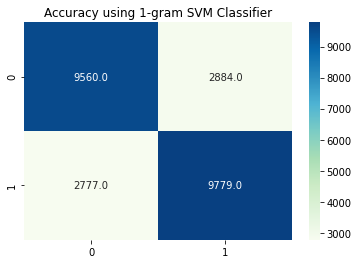

In [26]:
print("Accuracy using 1-gram SVM Classifier on Test data: {:.2f}%\n\n".format(accuracy1_1g*100))
seaborn.heatmap(cm1_1g, cmap = "GnBu", fmt = ".1f", annot = True)
plt.title("Accuracy using 1-gram SVM Classifier")
plt.show()

#### **SVM using 2-gram**

In [27]:
x_train,x_test,y_train,y_test = get_data(n_grams=(1,2),prep_data = prep_data)
model_inbuilt_2gram = SVC(kernel='linear', verbose= 1, max_iter=1000)
model_inbuilt_2gram.fit(x_train,y_train,sample_weight=None)

print("2-gram SVM Classifier score on Training data: {:.2f}%\n\n".format(model_inbuilt_2gram.score(x_train, y_train)*100))

TF-IDF calculation: Done!!
Splitted data
[LibSVM]

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


2-gram SVM Classifier score on Training data: 81.39%




In [30]:
y_pred1_2g = model_inbuilt_2gram.predict(x_test)
cm1_2g = confusion_matrix(y_test,y_pred1_2g)

accuracy1_2g= accuracy_score(y_test,y_pred1_2g)
f11_2g = f1_score(y_test,y_pred1_2g)
prec1_2g = precision_score(y_test,y_pred1_2g)
recall1_2g = recall_score(y_test,y_pred1_2g)
report1_2g = classification_report(y_test,y_pred1_2g, target_names=target_names)

joblib.dump(model_inbuilt_2gram, 'model_inbuilt_2gram.pkl')

print(report1_2g)

                    precision    recall  f1-score   support

Negative sentiment       0.78      0.79      0.79     12539
Positive Sentiment       0.79      0.78      0.78     12461

          accuracy                           0.79     25000
         macro avg       0.79      0.79      0.79     25000
      weighted avg       0.79      0.79      0.79     25000



Accuracy using 2-gram SVM Classifier on Test data: 78.60%




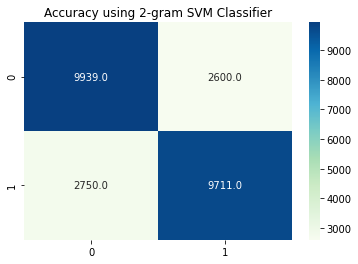

In [29]:
print("Accuracy using 2-gram SVM Classifier on Test data: {:.2f}%\n\n".format(accuracy1_2g*100))
seaborn.heatmap(cm1_2g, cmap = "GnBu", fmt = ".1f", annot = True)
plt.title("Accuracy using 2-gram SVM Classifier")
plt.show()

#### **SVM using 3-grams**

In [32]:
x_train,x_test,y_train,y_test = get_data(n_grams=(1,3),prep_data = prep_data)
model_inbuilt_3gram = SVC(kernel='linear', verbose= 1, max_iter=1000)
model_inbuilt_3gram.fit(x_train,y_train,sample_weight=None)

print("3-gram SVM Classifier score on Training data: {:.2f}%\n\n".format(model_inbuilt_3gram.score(x_train, y_train)*100))

TF-IDF calculation: Done!!
Splitted data
[LibSVM]

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


3-gram SVM Classifier score on Training data: 82.22%




In [33]:
y_pred1_3g = model_inbuilt_3gram.predict(x_test)
cm1_3g = confusion_matrix(y_test,y_pred1_3g)

accuracy1_3g= accuracy_score(y_test,y_pred1_3g)
f11_3g = f1_score(y_test,y_pred1_3g)
prec1_3g = precision_score(y_test,y_pred1_3g)
recall1_3g = recall_score(y_test,y_pred1_3g)
report1_3g = classification_report(y_test,y_pred1_3g, target_names=target_names)

joblib.dump(model_inbuilt_3gram, 'model_inbuilt_3gram.pkl')

print(report1_3g)

                    precision    recall  f1-score   support

Negative sentiment       0.78      0.80      0.79     12453
Positive Sentiment       0.79      0.77      0.78     12547

          accuracy                           0.78     25000
         macro avg       0.78      0.78      0.78     25000
      weighted avg       0.78      0.78      0.78     25000



Accuracy using 3-gram SVM Classifier on Test data: 78.48%




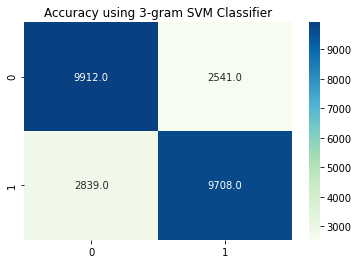

In [34]:
print("Accuracy using 3-gram SVM Classifier on Test data: {:.2f}%\n\n".format(accuracy1_3g*100))
seaborn.heatmap(cm1_3g, cmap = "GnBu", fmt = ".1f", annot = True)
plt.title("Accuracy using 3-gram SVM Classifier")
plt.show()

**2.2 Linear SVC from  Scratch**

In [63]:
import numpy as np
from sklearn import svm
import itertools


class MulticlassSVM:

    def __init__(self, n_iter = 1000):

        self.labels = None
        self.binary_svm = None
        self.W = None
        self.n_iter = n_iter
        
    def fit_cs(self, X, y):
        self.labels = np.unique(y)
        X_intercept = np.hstack([X, np.ones((len(X), 1))])

        N, d = X_intercept.shape
        K = len(self.labels)

        W = np.zeros((K, d))

        
        learning_rate = 1e-8
        for i in range(self.n_iter):
            W -= learning_rate * self.grad_student(W, X_intercept, y)

        self.W = W
        
    def predict_cs(self, X):
        X_intercept = np.hstack([X, np.ones((len(X), 1))])
        return self.labels[np.argmax(self.W.dot(X_intercept.T), axis=0)]

    def loss_student(self, W, X, y, C=1.0):
        """
        Compute loss function given W, X, y.
        For exact definitions, please check the MP document.
        Arguments:
            W: Weights. Numpy array of shape (K, d)
            X: Features. Numpy array of shape (N, d)
            y: Labels. Numpy array of shape N
            C: Penalty constant. Will always be 1 in the MP.
        Returns:
            The value of loss function given W, X and y.
        """
        if self.labels is None:
            self.labels = np.unique(y)

        # loss of regularization term
        l2_loss = 0.5 * np.sum(W**2)

        # gradient of the other term
        # get the matrix of term 1 - delta(j, y_i) + w_j^T * x_i
        loss_aug_inf = 1 - (self.labels[:, None] == y[None, :]) + np.matmul(W, np.transpose(X))  # (K, N)
        # sum over N of max value in loss_aug_inf
        loss_aug_inf_max_sum = np.sum(np.max(loss_aug_inf, axis=0))
        # sum over N of w_{y_i}^T * x_i
        wx_sum = np.sum(W[y] * X)
        multiclass_loss = C * (loss_aug_inf_max_sum - wx_sum)

        total_loss = l2_loss + multiclass_loss
        return total_loss
    def grad_student(self, W, X, y, C=1.0):
        """
        Compute gradient function w.r.t. W given W, X, y.
        For exact definitions, please check the MP document.
        Arguments:
            W: Weights. Numpy array of shape (K, d)
            X: Features. Numpy array of shape (N, d)
            y: Labels. Numpy array of shape N
            C: Penalty constant. Will always be 1 in the MP.
        Returns:
            The gradient of loss function w.r.t. W,
            in a numpy array of shape (K, d).
        """
        if self.labels is None:
            self.labels = np.unique(y)

        # gradient of regularization term
        l2_grad = W

        # gradient of the other term
        # get the matrix of term 1 - delta(j, y_i) + w_j^T * x_i
        loss_aug_inf = 1 - (self.labels[:, None] == y[None, :]) + np.matmul(W, np.transpose(X))  # (K, N)
        # get the j_max that maximizes the above matrix for every sample
        j_max = np.argmax(loss_aug_inf, axis=0)  # (N,)
        # gradient of sum(...) is:   x_i, if k == j_max_i and k != y_i  (pos_case)
        #                           -x_i, if k != j_max_i and k == y_i  (neg_case)
        #                              0, otherwise
        pos_case = np.logical_and((self.labels[:, None] == j_max[None, :]), (self.labels[:, None] != y[None, :]))
        neg_case = np.logical_and((self.labels[:, None] != j_max[None, :]), (self.labels[:, None] == y[None, :]))
        multiclass_grad = C * np.matmul(pos_case.astype(int) - neg_case.astype(int) , X)

        total_grad = l2_grad + multiclass_grad
        return total_grad

**2.3 Training on SVC from Scratch**

In [36]:
x_train,x_test,y_train,y_test = get_data(n_grams=(1,1),prep_data= prep_data)

model_Scratch_1gram = MulticlassSVM()
model_Scratch_1gram.fit_cs(x_train, y_train)

#print("1-gram SVM Classifier score on Training data: {:.2f}%\n\n".format(model_Scratch_1gram.score(x_train, y_train)*100))

TF-IDF calculation: Done!!
Splitted data


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:84: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:90: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:91: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


In [37]:
y_pred2_1g = model_Scratch_1gram.predict_cs(x_test)
cm2_1g = confusion_matrix(y_test,y_pred2_1g)

accuracy2_1g= accuracy_score(y_test,y_pred2_1g)
f12_1g = f1_score(y_test,y_pred2_1g)
prec2_1g = precision_score(y_test,y_pred2_1g)
recall2_1g = recall_score(y_test,y_pred2_1g)
report2_1g = classification_report(y_test,y_pred2_1g, target_names=target_names)

joblib.dump(model_Scratch_1gram, 'model_Scratch_1gram.pkl')

print(report2_1g)

                    precision    recall  f1-score   support

Negative sentiment       0.91      0.56      0.69     12529
Positive Sentiment       0.68      0.95      0.79     12471

          accuracy                           0.75     25000
         macro avg       0.80      0.75      0.74     25000
      weighted avg       0.80      0.75      0.74     25000



Accuracy using 1-gram SVM Classifier on Test data: 75.27%




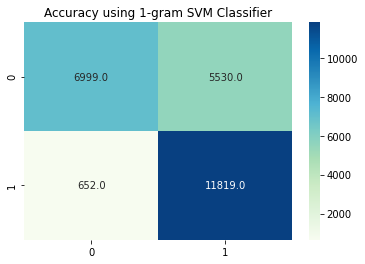

In [38]:
print("Accuracy using 1-gram SVM Classifier on Test data: {:.2f}%\n\n".format(accuracy2_1g*100))
seaborn.heatmap(cm2_1g, cmap = "GnBu", fmt = ".1f", annot = True)
plt.title("Accuracy using 1-gram SVM Classifier")
plt.show()

#### **Using 2-gram**

In [64]:
x_train,x_test,y_train,y_test = get_data(n_grams=(1,2), prep_data= prep_data)

model_Scratch_2gram = MulticlassSVM(n_iter=1500)
model_Scratch_2gram.fit_cs(x_train, y_train)

#print(model_Scratch_2gram.score(x_train, y_train))

TF-IDF calculation: Done!!
Splitted data


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:85: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:91: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:92: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


In [65]:
y_pred2_2g = model_Scratch_2gram.predict_cs(x_test)
cm2_2g = confusion_matrix(y_test,y_pred2_2g)

accuracy2_2g= accuracy_score(y_test,y_pred2_2g)
f12_2g = f1_score(y_test,y_pred2_2g)
prec2_2g = precision_score(y_test,y_pred2_2g)
recall2_2g = recall_score(y_test,y_pred2_2g)
report2_2g = classification_report(y_test,y_pred2_2g, target_names=target_names)

joblib.dump(model_Scratch_2gram, 'model_Scratch_2gram.pkl')

print(report2_2g)

                    precision    recall  f1-score   support

Negative sentiment       0.94      0.47      0.63     12534
Positive Sentiment       0.65      0.97      0.78     12466

          accuracy                           0.72     25000
         macro avg       0.79      0.72      0.70     25000
      weighted avg       0.79      0.72      0.70     25000



Accuracy using 2-gram SVM Classifier on Test data: 72.02%




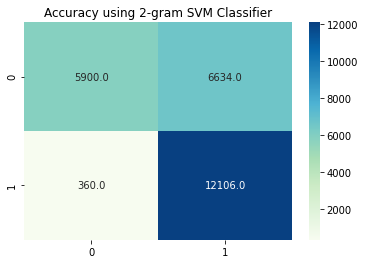

In [66]:
print("Accuracy using 2-gram SVM Classifier on Test data: {:.2f}%\n\n".format(accuracy2_2g*100))
seaborn.heatmap(cm2_2g, cmap = "GnBu", fmt = ".1f", annot = True)
plt.title("Accuracy using 2-gram SVM Classifier")
plt.show()

#### **Using 3-gram**

In [45]:
x_train,x_test,y_train,y_test = get_data(n_grams=(1,3),prep_data = prep_data)

model_Scratch_3gram = MulticlassSVM()
model_Scratch_3gram.fit_cs(x_train, y_train)
#print(model_Scratch_3gram.score(x_train, y_train))

TF-IDF calculation: Done!!
Splitted data


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:84: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:90: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:91: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


In [46]:
y_pred2_3g = model_Scratch_3gram.predict_cs(x_test)
cm2_3g = confusion_matrix(y_test,y_pred2_3g)

accuracy2_3g= accuracy_score(y_test,y_pred2_3g)
f12_3g = f1_score(y_test,y_pred2_3g)
prec2_3g = precision_score(y_test,y_pred2_3g)
recall2_3g = recall_score(y_test,y_pred2_3g)
report2_3g = classification_report(y_test,y_pred2_3g, target_names=target_names)

joblib.dump(model_Scratch_3gram, 'model_Scratch_3gram.pkl')

print(report2_3g)

                    precision    recall  f1-score   support

Negative sentiment       0.92      0.56      0.70     12527
Positive Sentiment       0.68      0.95      0.80     12473

          accuracy                           0.76     25000
         macro avg       0.80      0.76      0.75     25000
      weighted avg       0.80      0.76      0.75     25000



Accuracy using 3-gram SVM Classifier on Test data: 75.58%




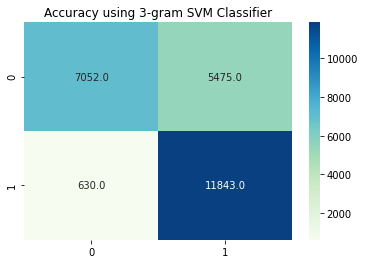

In [47]:
print("Accuracy using 3-gram SVM Classifier on Test data: {:.2f}%\n\n".format(accuracy2_3g*100))
seaborn.heatmap(cm2_3g, cmap = "GnBu", fmt = ".1f", annot = True)
plt.title("Accuracy using 3-gram SVM Classifier")
plt.show()

### 3. Performance Comparison